In [1]:
import pandas as pd
from mlflow.tracking import MlflowClient
import numpy as np

from matplotlib import pyplot as plt
from src.data_analysis.analysis_helpers import get_run_ids, get_labeledSamples_avgAcc, get_out_dirs
from src.database.mlflow import MLFlowClient
from src.database.mlflow import MLFlowClient
%matplotlib inline
# %pylab

import sys
import glob
sys.path.append('../')

from mlflow.tracking import MlflowClient
from src.database.mlflow import MLFlowClient
db = MLFlowClient(tracking_uri="http://mlflow.dbs.ifi.lmu.de:5000/", experiment_name="DMBAL")
tracking = MlflowClient()

runs_bp_smo = db.get_entries(['params.diversity_strategy', "params.uncertainty", "params.clustering", "params.number_clusters","params.max_epochs", "params.learning_rate", "params.optimizer"],[True, True, True, True, True, True, True],["bp_smo_canceled", "margin", "kmeans",10, 30, 0.01, "Adam"])
print(len(runs_bp_smo))
run_ids_smo = get_run_ids(runs_bp_smo)
#print('/nfs/data3/obermeier/dmbal/experiments/' + run_ids_smo.array[0])
print(run_ids_smo)

/Users/ilijanaspasojevic/PycharmProjects/dmbal/src/data_analysis/analysis_helpers.py:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  from pandas import np


10
0    9ab696d7bdad462e9fc2434c7c34eac6
1    61ce16ab6d444df4a67961ad01e7c44e
2    5406131805f04c69b5135a9bdc83c8af
3    333ecd4379d34f2a88f6fd6537ed5eac
4    b95abd020b9f405ead4993c76b34e233
5    af5383be32dd46a99d894a3d596930ad
6    a044587124f847d08a94b9692eb59549
7    b4ac311b2d55493092fbca84b1dbeca9
8    a42be7fba7fb43ec91c9a56b858c4be2
9    14cb91895bd843f094d5a571c09bd737
Name: run_id, dtype: object


In [2]:
# def get_out_dirs(run_ids):
#     out_dir = '/nfs/data3/obermeier/dmbal/experiments/' + run_ids.array[0]
#     out_dirs = np.array(out_dir)
#     i=1
#     while i < len(run_ids.array):
#         out_dir = '/nfs/data3/obermeier/dmbal/experiments/' + run_ids.array[i]
#         out_dirs = np.append(out_dirs, out_dir)
#         i+=1
#     return out_dirs

runs_bp_lmo = db.get_entries(['params.diversity_strategy', "params.uncertainty", "params.clustering", "params.max_epochs", "params.learning_rate"],[True, True, True, True, True],["bp_lmo_canceled", "margin", "kmeans", 30, 0.01])
print(len(runs_bp_lmo))
run_ids_bp_lmo = get_run_ids(runs_bp_lmo)
out_dirs = get_out_dirs(run_ids_bp_lmo)
print(out_dirs)


10
['/nfs/data3/obermeier/dmbal/experiments/52cb83fe7df64b5baf369ee172b4194b'
 '/nfs/data3/obermeier/dmbal/experiments/cf55da05f9014799a7ea6c4c6f189e8b'
 '/nfs/data3/obermeier/dmbal/experiments/3cac9b6bb43a46ba89174d5545b1472b'
 '/nfs/data3/obermeier/dmbal/experiments/942d8a9d4b8949da936e56b7bebf2961'
 '/nfs/data3/obermeier/dmbal/experiments/8f2de7f57bef4d6889af99c1bada9d9f'
 '/nfs/data3/obermeier/dmbal/experiments/82450bc16f3549e7b4f78993e2d7482d'
 '/nfs/data3/obermeier/dmbal/experiments/1639246723fe44dbad66fe5155028d10'
 '/nfs/data3/obermeier/dmbal/experiments/9f493c52db5d4502aa1bac79bbe4f058'
 '/nfs/data3/obermeier/dmbal/experiments/30dd1731ef874173b1de5d7bd0bd2c2d'
 '/nfs/data3/obermeier/dmbal/experiments/9f21365e4d504368b52a04455a7a25b1']


In [3]:
samples_labeled_bp_smo, avg_accs_bp_smo = get_labeledSamples_avgAcc(run_ids_smo, tracking)
samples_labeled_bp_lmo, avg_accs_bp_lmo = get_labeledSamples_avgAcc(run_ids_bp_lmo, tracking)

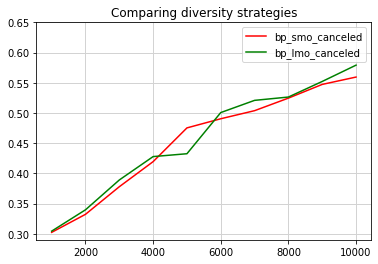

In [4]:
# plot
plt.plot(samples_labeled_bp_smo, avg_accs_bp_smo,color='red', label='bp_smo_canceled')
plt.plot(samples_labeled_bp_lmo, avg_accs_bp_lmo,color='green', label='bp_lmo_canceled')
plt.legend()
plt.title(f"Comparing diversity strategies")
plt.grid(b=True, color='lightgrey', linestyle='-', linewidth=1)
plt.ylim([0.29, 0.65])

plt.show()